## Исследование данных о российском кинопрокате



`Суть проекта` - Даны данные от Министерства культуры РФ. По ним нужно:
   - Изучить рынок российского кинопроката<br>
   - Выявить различные закономерности или их отсутствие <br>

`Конечная цель проекта` - Оценка влияния различных факторов и действий на те или иные кинофильмы.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

Во время перевода столбца puNumber в целочисленный формат была ошибка, т.к в нем встречалось 'нет' в одной из ячеек. Нашел эту ячейку и удалил строку связанную с ней а затем объединил две таблицы по puNumber путем методом `merge` с параметром `inner` поскольку главная цель проекта - выявить тренды российского кинопроката, поэтому значения где не известны сборы в российских кинотеатрах никак не помогут для выявления трендов

In [251]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import re

%matplotlib inline
pd.options.display.float_format ='{:,.3f}'.format

In [245]:
data = pd.read_csv('mkrf_movies.csv')
data_2 = pd.read_csv('mkrf_shows.csv')
data.info()
print()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

`Dtype`, относящийся  к puNumber разный в `mkrf_movies` и `mkrf_shows`, из-за наличия пропуска в первой таблице

In [246]:
print('Кол-во до:' + str(data['puNumber'].count()))
data['puNumber'] = data['puNumber'].replace(' ', '')
print('Кол-во после:' + str(data['puNumber'].count()))

Кол-во до:7486
Кол-во после:7486


In [247]:
data.loc[data['puNumber'] == 'нет', 'puNumber'] = 0

Пропуск был заменен на `0`

In [248]:
data['puNumber'] = data['puNumber'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Как видно, количество строк не изменилось, теперь можно заняться объединением

In [249]:
data = data.merge(data_2, how = 'outer', on = 'puNumber')
display(data)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Изучив таблицу и представленные мне данные, а так же с помощью метода `.info()` выявил, что:<br>
`show_start_date` - Представлен в `object` типе, а должен в типе `datetime`.<br>
`film_studio` - Встречаются пропуски.<br>
`production_country` - Аналогично как и с `film_studio`.<br>
`director` - Так же встречаются пропуски.<br>
`producer` - Так же встречаются пропуски.<br>
`refundable_support` - Очень много пропусков, в дальнейшем надо будет их заполнить а так же перевести из типа `float64` в тип `int64`.<br>
`nonrefundable_support` - Аналогично с `refundable_support`.<br>
`budget` - Так же встречаются пропуски и неправильный `Dtype`.<br>
`financing_source` - Так же встречаются пропуски, однако `Dtype` верный.<br>
`ratings` - Есть пропуски, так же лучше перевести в тип `float64`.<br>
`genres` - Имеются пропуски. Тип верный.<br>
`box_office` - Сборы в рублях, нужно перевести в тип `int64`<br>

- Преобразование типов данных и анализ пропусков

In [179]:
data.isna().mean()

title                   0.000
puNumber                0.000
show_start_date         0.000
type                    0.000
film_studio             0.002
production_country      0.000
director                0.001
producer                0.076
age_restriction         0.000
refundable_support      0.956
nonrefundable_support   0.956
budget                  0.956
financing_source        0.956
ratings                 0.129
genres                  0.130
box_office              0.578
dtype: float64

Text(0.5, 1.0, 'Объем пропусков в наборе данных')

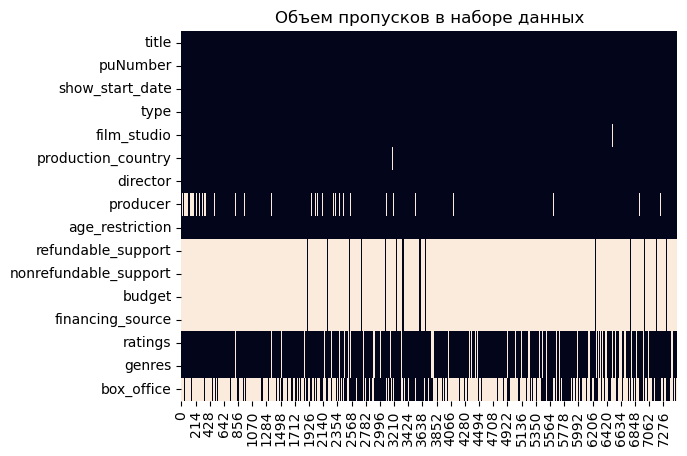

In [252]:
sb.heatmap(data.isna().transpose(), cbar=False).set_title('Объем пропусков в наборе данных')

Как можно увидеть, `refundable_support`, `nonrefundable_support`, `budget`, `financing_source ` уровень пропусков равен 95%+, однако если обратиться к описанию данных, можно понять, что данные столбцы являются отображением того, сколько было выделенно РФ на эти фильмы. От сюда следует, что 95% фильмов не имели финансирования от РФ. Эти пропуски можно заполнить нулями кроме последнего.<br>

В столбце `ratings` доля пропусков равна 13%, скорее всего проблема связана с некорректным взятием рейтинга или технической ошибкой. Такие пропуски можно заполнить нулями и не учитывать эти строки в дальнейшем анализе.

`genres` так же имеет 13% пропусков и так же не известно с чем они связаны. 

`box_office` показывает сколько собрал тот или иной фильм в Российских кинотеатрах. 58% пропусков показывает, что большинство фильмов не показывалось в Российских кинотеатрах, либо данные просто не вписали.

Так же пропуски имеются у столбцов `film_studio`, `production_country`, `director` и `producer`, в размере 0,24%, 0,026%, 0,12% и 7,5% соответственно. У всех четырёх показателей доля пропусков незначительна и связана скорее всего с какой-то технической ошибкой, либо ошибкой при заполнении данных.

In [180]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')
data['show_start_date'] = pd.DatetimeIndex(data['show_start_date']).floor('S').tz_localize(None)
display(data['show_start_date'])

0      2015-11-27 12:00:00
1      2016-09-13 12:00:00
2      2016-10-10 12:00:00
3      2016-06-10 12:00:00
4      2015-07-29 12:00:00
               ...        
7481   2019-12-23 12:00:00
7482   2019-12-24 12:00:00
7483   2019-12-28 12:00:00
7484   2019-12-30 12:00:00
7485   2019-12-30 12:00:00
Name: show_start_date, Length: 7486, dtype: datetime64[ns]

In [181]:
#Преобразование процентов и заполнение пропусков нулями
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce')
data['ratings'] = data['ratings'].fillna(0).astype('float64')
data['ratings'] = data.loc[data['ratings']!= 0, 'ratings']
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

In [182]:
#Преобразование оставшихся столбцов
data[['film_studio', 'production_country', 'director', 'producer', 'genres']] = data[['film_studio', 'production_country', 'director', 'producer', 'genres']].fillna('unknown')
data.isna().mean()

title                   0.000
puNumber                0.000
show_start_date         0.000
type                    0.000
film_studio             0.000
production_country      0.000
director                0.000
producer                0.000
age_restriction         0.000
refundable_support      0.956
nonrefundable_support   0.956
budget                  0.956
financing_source        0.956
ratings                 0.133
genres                  0.000
box_office              0.578
dtype: float64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [183]:
data.duplicated().sum()

0

Хоть явных дубликатов и не обнаружилось по всем столбцам, однако дубликаты всё равно имеются, но надо взять два определенных столбца.

In [184]:
print('До исправления: ', data.duplicated(subset=['title', 'director']).sum())
print('Доля дубликатов: ', (data.duplicated(subset=['title', 'director']).sum()/len(data['title']))*100)
data = data.drop_duplicates(subset=['title', 'director'])
print('После исправления: ', data.duplicated(subset=['title', 'director']).sum())

До исправления:  683
Доля дубликатов:  9.123697568795084
После исправления:  0


Явные дубликаты были удалены в количестве 683 штук, это всего 9.12% от общей выборки, не сильно критично ниже проверю на неявные дубликаты.

Для начала определил в каких столбцах уместно искать неявные дубликаты:
`type`, `production_country`, `age_restriction`, `financing_source`, в них и буду искать неявные дубликаты.

In [185]:
display(data)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.700,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.300,"мелодрама,комедия","2,700.000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,unknown,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.400,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,unknown,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,unknown,NaN


К столбцам с категориальными переменными относятся: `type`, `title`, `film_studio`, `production_country`, `director`, `producer`, `age_restriction`, `financing_source`, `genres`. Проверим их на уникальность:

In [186]:
print(data['type'].unique())
print('\n',data['title'].unique())
print('\n',data['film_studio'].unique())
print('\n',data['production_country'].unique())
print('\n',data['director'].unique())
print('\n',data['producer'].unique())
print('\n',data['age_restriction'].unique())
print('\n',data['financing_source'].unique())
print('\n',data['genres'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']

 ['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']

 ['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз'
 'Киностудия "Мосфильм"'
 'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз'
 ...
 'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента '
 'Никелодеон Анимейшн Студиос, Спин Мастер'
 'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"']

 ['США' 'СССР' 'Франция' 'СССР, Венгрия' 'Германия-Великобритания'
 'Великобритания - Италия' 'Чехословакия' 'США - Франция - Турция'
 'Новая Зеландия' 'Канада - Франция - Испания' 'США-Германия'
 'США - Вели

Одна из главных проблем - в таких столбцах как `production_county`, `producer`, `genres`, `director` страны, продюсеры и режисеры, и жанры имеюстя такие разделители: `-` или `,` из-за чего невозможно отнести тот или иной фильм к какой-либо конкретной категории а так же сделать проверку на неявные дубликаты.

Для начала определил в каких столбцах уместно искать неявные дубликаты:
`type`, `production_country`, `age_restriction`, `financing_source`, в них и буду искать неявные дубликаты.

In [187]:
print('До исправления:', data['type'].unique())   #Есть 2 дубликата
data.loc[data['type'] == ' Анимационный', 'type'] = 'Анимационный'
data.loc[data['type'] == ' Художественный', 'type'] = 'Художественный'
print('\nПоисле исправления: ', data['type'].unique())
print('\nПроверяю сохранились ли строки: ', data['type'].describe())   


До исправления: ['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']

Поисле исправления:  ['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']

Проверяю сохранились ли строки:  count               6803
unique                 6
top       Художественный
freq                5303
Name: type, dtype: object


In [188]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [189]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [190]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [191]:
duplicates_title_punumber = data[['title', 'puNumber']]
display(duplicates_title_punumber)
print(f'Кол-во дупликатов:{duplicates_title_punumber.duplicated().sum()}')

,title,puNumber
0,Открытый простор,221048915
1,Особо важное задание,111013716
2,Особо опасен,221038416
5,Остановился поезд,111013816
6,Любовь и голуби,111007013
...,...,...
7481,Сад художника: Американский импрессионизм,126008019
7482,Звериная ярость,121037819
7483,Щенячий патруль: Скорей спешим на помощь!,124010819
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619


Кол-во дупликатов:0


#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?

In [192]:
budget = data[['refundable_support', 'nonrefundable_support', 'budget']]
display(budget.query(('(budget == 0) and (nonrefundable_support!=0)')))

,refundable_support,nonrefundable_support,budget
2053,0.000,"23,000,000.000",0.000
2058,0.000,"75,000,000.000",0.000
2472,"10,000,000.000","70,000,000.000",0.000
2615,"60,000,000.000","100,000,000.000",0.000
2684,0.000,"59,000,000.000",0.000
2788,0.000,"35,000,000.000",0.000
2874,0.000,"6,000,000.000",0.000
3047,"19,000,000.000","51,000,000.000",0.000
3565,0.000,"250,000,000.000",0.000
3675,"20,000,000.000","20,000,000.000",0.000


In [193]:
data[data['budget'] == 0].describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,17.000,17.000,17.000,17.000,16.000,17.000
mean,"112,067,204.471","16,705,882.353","65,174,674.412",0.000,5.725,"163,137,294.425"
std,"1,473,501.270","20,064,784.779","61,236,204.091",0.000,0.916,"251,115,991.429"
min,"111,000,415.000",0.000,0.000,0.000,4.300,"1,334,699.400"
25%,"111,009,615.000",0.000,"23,000,000.000",0.000,5.075,"50,451,949.000"
50%,"111,017,315.000","10,000,000.000","51,000,000.000",0.000,5.700,"72,937,783.200"
75%,"114,001,715.000","20,000,000.000","75,000,000.000",0.000,6.300,"184,487,551.400"
max,"114,006,518.000","60,000,000.000","250,000,000.000",0.000,7.800,"1,038,321,489.000"


После анализа трех столбцов, пришел к выводу, что если хоть где-то из двух столбцов `refundable_support` или `nonrefundable_support` имеется какое-либо значение отличное от нуля, то это значит что бюджет в любом случае не может быть равен нулю. Надо исправить значения в столбце бюджета на суммы поддержок.

In [194]:
def check_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']
data['corrected_budget'] = data.apply(check_budget, axis = 1)
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,corrected_budget
count,"6,803.000",331.000,331.000,331.000,"5,815.000","3,027.000",331.000
mean,"130,808,243.346","11,900,302.115","49,038,333.269","127,469,081.387",6.454,"75,392,839.841","131,674,427.202"
std,"34,136,999.885","24,945,704.904","60,061,812.815","188,823,340.914",1.112,"237,344,584.518","187,375,150.397"
min,0.000,0.000,0.000,0.000,1.000,0.000,"6,000,000.000"
25%,"112,001,868.500",0.000,"25,000,000.000","42,000,000.000",5.800,"119,359.500","45,510,944.000"
50%,"121,013,219.000",0.000,"30,000,000.000","68,809,226.000",6.600,"2,418,702.000","71,517,631.000"
75%,"124,000,417.500","15,000,000.000","40,750,000.000","143,945,639.000",7.200,"23,608,211.370","150,000,000.000"
max,"231,001,012.000","180,000,000.000","400,000,000.000","2,305,074,303.000",9.200,"3,073,568,690.790","2,305,074,303.000"


В конечном итоге создал новые столбец в котором бюджет является как минимум суммой `refundable_support` и `nonrefundable_support`

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [195]:
data['year'] = data['show_start_date'].dt.year
display(data['year'])

0       2015
1       2016
2       2016
5       2016
6       2013
        ... 
7481    2019
7482    2019
7483    2019
7484    2019
7485    2019
Name: year, Length: 6803, dtype: int64

In [196]:
data['box_office'].describe()

count           3,027.000
mean       75,392,839.841
std       237,344,584.518
min                 0.000
25%           119,359.500
50%         2,418,702.000
75%        23,608,211.370
max     3,073,568,690.790
Name: box_office, dtype: float64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [197]:
data['director_first'] = data['director'].str.split(",").str[0]
data['director_first'] = data['director_first'].str.strip()
data['genre_first'] = data['genres'].str.split(',').str[0]
data['genre_first'] = data['genre_first'].str.strip()
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,corrected_budget,year,director_first,genre_first
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма,военный",NaN,NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.700,драма,NaN,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.300,"мелодрама,комедия","2,700.000",NaN,2013,В.Меньшов,мелодрама


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [198]:
data['ratio_budget'] =(data['refundable_support'] + data['nonrefundable_support']) / data['corrected_budget']
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,corrected_budget,year,ratio_budget
count,"6,803.000",331.000,331.000,331.000,"5,815.000","3,027.000",331.000,"6,803.000",331.000
mean,"130,808,243.346","11,900,302.115","49,038,333.269","127,469,081.387",6.454,"75,392,839.841","131,674,427.202","2,014.837",0.542
std,"34,136,999.885","24,945,704.904","60,061,812.815","188,823,340.914",1.112,"237,344,584.518","187,375,150.397",2.959,0.197
min,0.000,0.000,0.000,0.000,1.000,0.000,"6,000,000.000","2,010.000",0.044
25%,"112,001,868.500",0.000,"25,000,000.000","42,000,000.000",5.800,"119,359.500","45,510,944.000","2,012.000",0.385
50%,"121,013,219.000",0.000,"30,000,000.000","68,809,226.000",6.600,"2,418,702.000","71,517,631.000","2,015.000",0.613
75%,"124,000,417.500","15,000,000.000","40,750,000.000","143,945,639.000",7.200,"23,608,211.370","150,000,000.000","2,018.000",0.662
max,"231,001,012.000","180,000,000.000","400,000,000.000","2,305,074,303.000",9.200,"3,073,568,690.790","2,305,074,303.000","2,019.000",1.000


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Поскольку просят посмотреть именно по фильмам, которые показывали в кинотеатрах, то тут потребуется столбец box_office.

In [199]:
data.groupby('year')['box_office'].count().sum()

3027

,year,Count
0,2010,88
1,2011,98
2,2012,116
3,2013,176
4,2014,257
5,2015,431
6,2016,501
7,2017,357
8,2018,474
9,2019,529


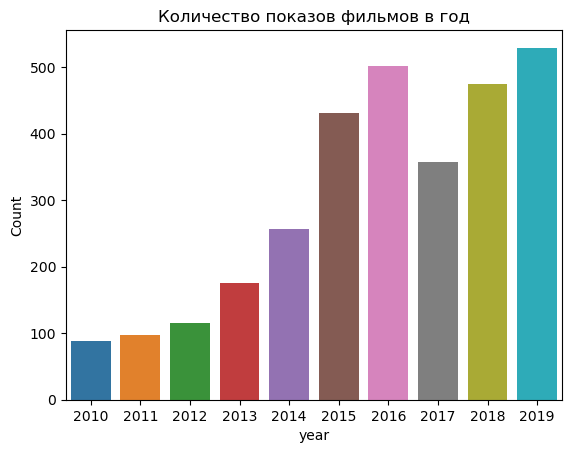

In [200]:
box_per_year_count = data.groupby('year')['box_office'].count().reset_index()
box_per_year_count.rename(columns={'box_office' : 'Count'}, inplace=True)
display(box_per_year_count)
sb.barplot(x = 'year', y = 'Count', data = box_per_year_count)
plt.title('Количество показов фильмов в год')
plt.show()

0.445


,year,Mean
0,2010,11.549
1,2011,20.545
2,2012,22.437
3,2013,29.831
4,2014,35.205
5,2015,65.204
6,2016,64.981
7,2017,71.400
8,2018,53.741
9,2019,57.941


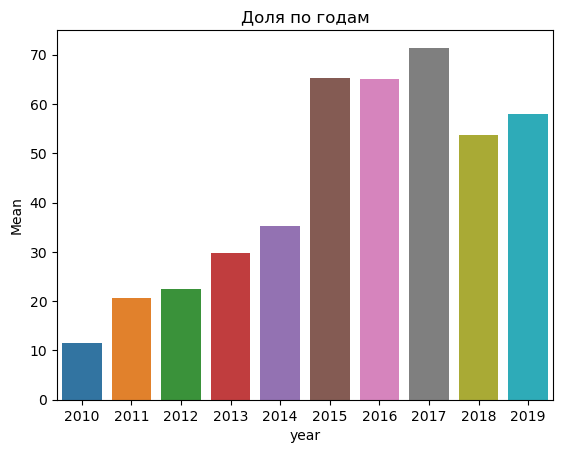

In [201]:
mean = 1 - (data['box_office'].isna().sum() / data.shape[0])
print(round(mean, 3))
box_per_year_mean = (data[['year', 'box_office']].groupby('year').apply(lambda x: x['box_office'].apply(pd.notna).mean())*100).reset_index()
box_per_year_mean.rename(columns={0 : 'Mean'}, inplace=True)
display(box_per_year_mean)
sb.barplot(x='year', y='Mean', data=box_per_year_mean)
plt.title('Доля по годам')
plt.show()

Доля проката в кинотеатрах равна около 44,5%

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,year,Sum
0,2010,"2,374,340.000"
1,2011,"13,944,390.000"
2,2012,"6,465,111.000"
3,2013,"29,768,531.200"
4,2014,"7,372,598,571.600"
5,2015,"32,084,649,858.370"
6,2016,"43,731,444,689.340"
7,2017,"48,563,707,217.510"
8,2018,"47,985,723,095.290"
9,2019,"48,423,450,395.590"


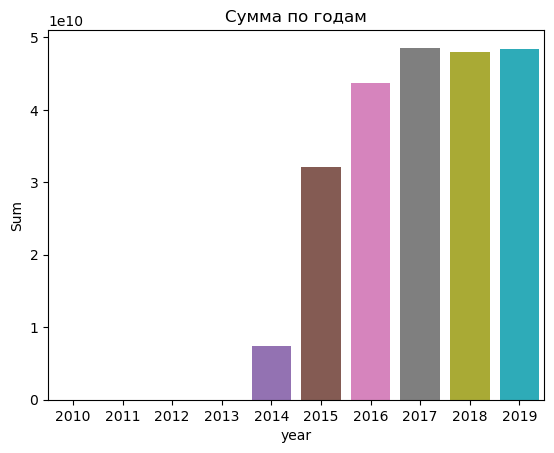

In [202]:
box_per_year_sum = data.groupby('year')['box_office'].sum().reset_index()
box_per_year_sum.rename(columns={'box_office' : 'Sum'}, inplace=True)
display(box_per_year_sum)
sb.barplot(x='year', y='Sum', data=box_per_year_sum)
plt.title('Сумма по годам')
plt.show()

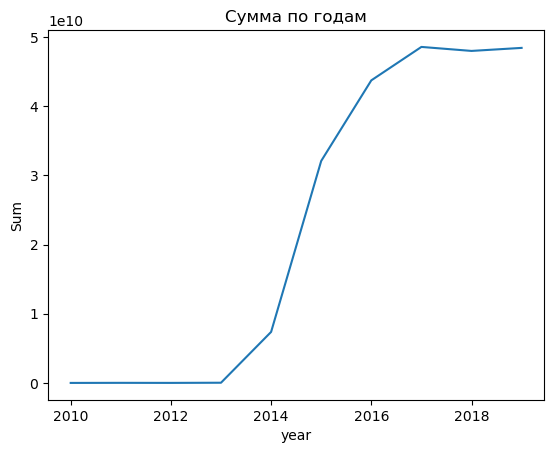

In [203]:
sb.lineplot(x='year', y='Sum', data = box_per_year_sum)
plt.title('Сумма по годам');

In [204]:
box_per_year = box_per_year_count.merge(box_per_year_mean, how = 'left', on = 'year')
box_per_year = box_per_year.merge(box_per_year_sum, how = 'left', on = 'year')
box_per_year.rename(columns={'box_office' : 'Count', 0 : 'Ratio'}, inplace=True)
display(box_per_year)

,year,Count,Mean,Sum
0,2010,88,11.549,"2,374,340.000"
1,2011,98,20.545,"13,944,390.000"
2,2012,116,22.437,"6,465,111.000"
3,2013,176,29.831,"29,768,531.200"
4,2014,257,35.205,"7,372,598,571.600"
5,2015,431,65.204,"32,084,649,858.370"
6,2016,501,64.981,"43,731,444,689.340"
7,2017,357,71.400,"48,563,707,217.510"
8,2018,474,53.741,"47,985,723,095.290"
9,2019,529,57.941,"48,423,450,395.590"


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [207]:
sv_tablet = data.groupby('year')['box_office'].agg(['mean', 'median'])
display(sv_tablet)

,mean,median
year,,
2010,"26,981.136","1,868.000"
2011,"142,289.694","3,042.500"
2012,"55,733.716","6,692.500"
2013,"169,139.382","3,565.000"
2014,"28,687,153.975","22,490.000"
2015,"74,442,343.059","4,327,265.700"
2016,"87,288,312.753","3,640,802.300"
2017,"136,032,793.326","9,968,340.000"
2018,"101,235,702.733","8,821,498.980"


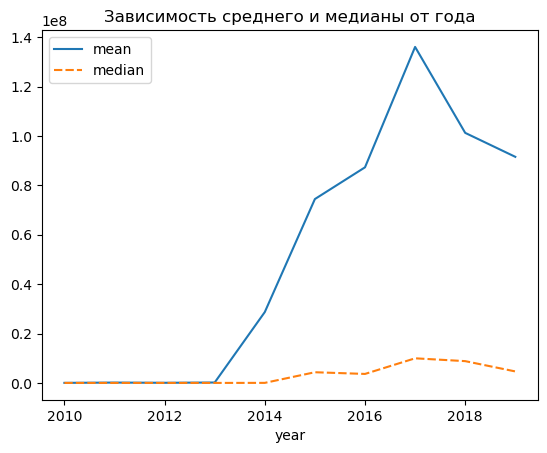

In [208]:
sb.lineplot(data = sv_tablet)
plt.title('Зависимость среднего и медианы от года')
plt.show()

Судя по графику, можно сделать вывод, что в данных присутствуют невероятно большие значения `box_office`. Так же при всём при этом можно с уверенность сказать, что самый прибыльный год это 2017 т.к в нём как медиана так и среднее значение самые большие в сравнении с остальными годами.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [209]:
data.query('2015 <= year').groupby('age_restriction')['box_office'].sum()

age_restriction
«0+» - для любой зрительской аудитории      703,345,315.380
«12+» - для детей старше 12 лет          58,934,475,731.450
«16+» - для детей старше 16 лет          68,950,728,612.280
«18+» - запрещено для детей              36,707,905,393.410
«6+» - для детей старше 6 лет            55,492,520,203.580
Name: box_office, dtype: float64

Больше всего сборов у фильмов с фозрастным ограничением 16+

In [210]:
age_tablet = data.query('2015 <= year').groupby(['year', 'age_restriction'])['box_office'].agg('sum').reset_index()
display(age_tablet)

,year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,"273,367,767.780"
1,2015,«12+» - для детей старше 12 лет,"11,957,220,583.410"
2,2015,«16+» - для детей старше 16 лет,"8,274,253,188.890"
3,2015,«18+» - запрещено для детей,"3,184,097,942.980"
4,2015,«6+» - для детей старше 6 лет,"8,395,710,375.310"
5,2016,«0+» - для любой зрительской аудитории,"150,183,548.670"
6,2016,«12+» - для детей старше 12 лет,"12,178,337,053.010"
7,2016,«16+» - для детей старше 16 лет,"14,359,349,614.800"
8,2016,«18+» - запрещено для детей,"4,990,430,064.620"
9,2016,«6+» - для детей старше 6 лет,"12,053,144,408.240"


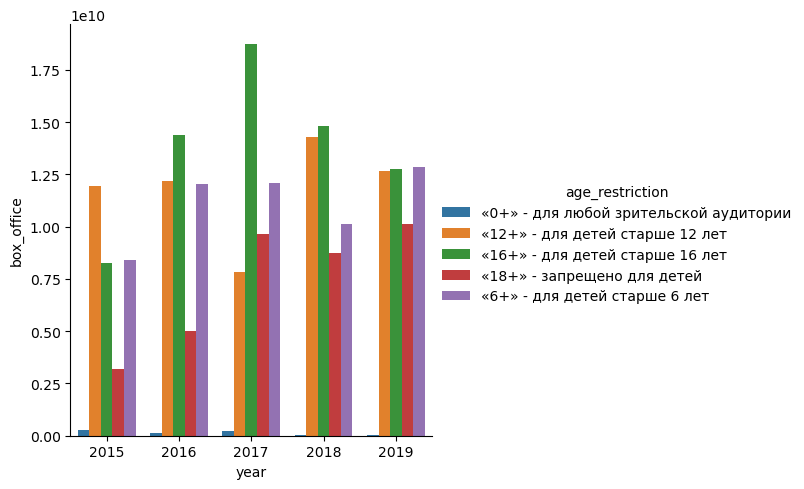

In [211]:
sb.catplot(x='year', y='box_office', hue='age_restriction', data=age_tablet, kind='bar')
plt.show()

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [219]:
data_film = data[data['corrected_budget'].isna() == False].copy()

In [220]:
data_film['support'] = data_film['refundable_support'] + data_film['nonrefundable_support']
data_film['payback'] = data_film['box_office'] - data_film['corrected_budget']
data_film.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,corrected_budget,year,ratio_budget,support,payback
count,331.000,331.000,331.000,331.000,313.000,317.000,331.000,331.000,331.000,331.000,317.000
mean,"111,595,590.698","11,900,302.115","49,038,333.269","127,469,081.387",6.003,"132,843,063.693","131,674,427.202","2,016.713",0.542,"60,938,635.384","571,336.176"
std,"5,711,574.248","24,945,704.904","60,061,812.815","188,823,340.914",1.125,"335,287,034.808","187,375,150.397",1.638,0.197,"72,845,765.086","316,399,203.266"
min,"111,000,115.000",0.000,0.000,0.000,1.000,"1,550.000","6,000,000.000","2,013.000",0.044,"3,000,000.000","-1,971,477,243.410"
25%,"111,004,867.000",0.000,"25,000,000.000","42,000,000.000",5.300,"1,231,902.000","45,510,944.000","2,015.000",0.385,"25,322,500.000","-70,903,859.000"
50%,"111,010,415.000",0.000,"30,000,000.000","68,809,226.000",6.200,"16,077,204.000","71,517,631.000","2,017.000",0.613,"35,000,000.000","-40,518,222.500"
75%,"111,017,816.500","15,000,000.000","40,750,000.000","143,945,639.000",6.700,"106,514,301.030","150,000,000.000","2,018.000",0.662,"60,000,000.000","-2,312,697.880"
max,"214,010,116.000","180,000,000.000","400,000,000.000","2,305,074,303.000",8.500,"3,073,568,690.790","2,305,074,303.000","2,019.000",1.000,"500,000,000.000","2,913,568,690.790"


Более `75%` фильмов не окупаются. Средняя выручка за фильм составляет: `571 336` рублей.

In [226]:
display(data_film.groupby('year')['support'].count())
display(data_film.groupby('year')['support'].sum())

year
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    69
Name: support, dtype: int64

year
2013     134,347,945.000
2014     572,002,299.000
2015   3,656,241,459.000
2016   4,303,155,482.000
2017   3,183,971,662.000
2018   3,446,969,465.000
2019   4,874,000,000.000
Name: support, dtype: float64

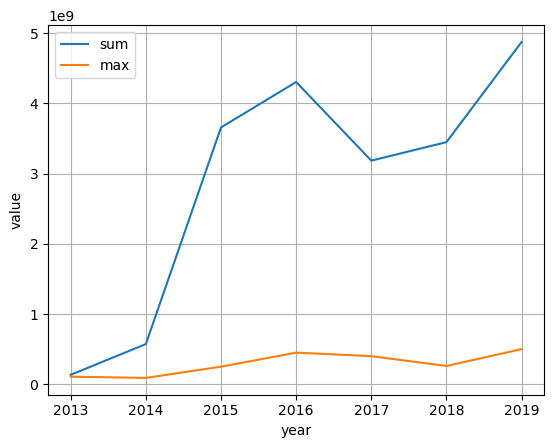

In [238]:
data_film.groupby('year')['support'].agg(['sum', 'max']).plot(grid = True)
plt.ylabel('value')
plt.show()

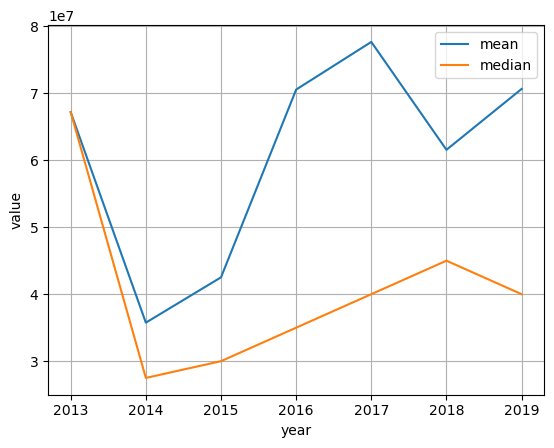

In [239]:
data_film.groupby('year')['support'].agg(['mean', 'median']).plot(grid = True)
plt.ylabel('value')
plt.show()

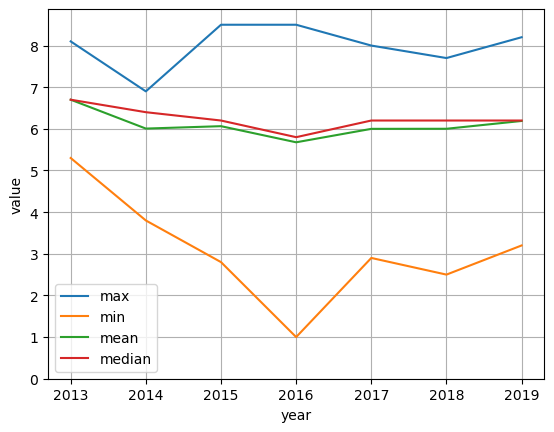

In [236]:
data_4.groupby('year')['ratings'].agg(['max', 'min', 'mean', 'median']).plot(grid = True, ylim = 0)
plt.ylabel('value')
plt.show()

In [243]:
genres_support = data_film.groupby('genre_first')['support'].agg(['count', 'sum', 'mean', 'median'])
display(genres_support.sort_values(by = 'sum', ascending = False))
genres_ratings = data_4.groupby('genre_first')['ratings'].agg(['count', 'mean', 'median'])
display(genres_ratings.sort_values(by = 'mean', ascending = False))

,count,sum,mean,median
genre_first,,,,
драма,93,"5,314,406,632.000","57,144,157.333","30,000,000.000"
комедия,74,"3,218,282,945.000","43,490,310.068","35,000,000.000"
мультфильм,31,"2,461,520,000.000","79,403,870.968","70,000,000.000"
фантастика,11,"1,406,000,000.000","127,818,181.818","30,000,000.000"
история,4,"1,020,000,000.000","255,000,000.000","240,000,000.000"
фэнтези,10,"1,002,900,000.000","100,290,000.000","62,000,000.000"
триллер,15,"769,645,285.000","51,309,685.667","40,000,000.000"
приключения,7,"696,000,000.000","99,428,571.429","40,000,000.000"
unknown,16,"688,969,465.000","43,060,591.562","30,000,000.000"


,count,mean,median
genre_first,,,
криминал,3,7.500,7.800
детский,4,7.125,7.250
спорт,3,6.933,7.000
биография,3,6.900,6.900
детектив,5,6.760,6.800
боевик,6,6.583,6.450
мюзикл,4,6.550,6.600
военный,9,6.467,6.400
драма,92,6.391,6.400
